In [ ]:
# import 필요한 라이브러리
import os
from natsort import natsorted
from pathlib import Path
import shutil
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# 필요한 함수 선언
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

In [3]:
# 필요한 함수 정의
def axis3plot(position,data,name):
    subAJ_right = 0.5
    subAJ_top = 1.5
    subAJ_wspace = 0.5
    sub_offset= 40

    data = data.astype(float)
    
    host = host_subplot(position, axes_class=AA.Axes)
    plt.subplots_adjust(right=subAJ_right,top=subAJ_top, wspace=subAJ_wspace)

    par1 = host.twinx()
    par2 = host.twinx()

    offset = sub_offset
    new_fixed_axis = par2.get_grid_helper().new_fixed_axis
    par2.axis["right"] = new_fixed_axis(loc="right",
                                        axes=par2,
                                        offset=(offset, 0))

    par1.axis["right"].toggle(all=True) 
    par2.axis["right"].toggle(all=True)

    # host.set_xlim(0, 2)
    # host.set_ylim(0, 2)

    host.set_xlabel(f"Time/{name}")
    # host.set_ylabel("X_axis")
    # par1.set_ylabel("Y_axis")
    # par2.set_ylabel("Z_axis")

    p1, = host.plot(range(0,len(data)), np.array(data.iloc[:,0]), label="X_axis")
    p2, = par1.plot(range(0,len(data)),  np.array(data.iloc[:,1]), label="Y_axis")
    p3, = par2.plot(range(0,len(data)),  np.array(data.iloc[:,2]), label="Z_axis")

    # par1.set_ylim(0, 4)
    # par2.set_ylim(1, 65)

    host.legend()

    host.axis["left"].label.set_color(p1.get_color())
    par1.axis["right"].label.set_color(p2.get_color())
    par2.axis["right"].label.set_color(p3.get_color())

    host.axis["left"].major_ticks.set_color(p1.get_color())
    par1.axis["right"].major_ticks.set_color(p2.get_color())
    par2.axis["right"].major_ticks.set_color(p3.get_color())

    host.axis["left"].major_ticklabels.set_color(p1.get_color())
    par1.axis["right"].major_ticklabels.set_color(p2.get_color())
    par2.axis["right"].major_ticklabels.set_color(p3.get_color())

In [ ]:
loadDir = 'RAW'
saveDir = 'FIG'
patientList = natsorted([_ for _ in os.listdir(loadDir)])

for patient in tqdm(patientList):
    visitList = natsorted([_ for _ in os.listdir(os.path.join(loadDir,patient))])
    savePdfDir = os.path.join(saveDir,patient)
    ensure_dir(savePdfDir)
    for visit in visitList:
        # IMU 파일 경로
        imuDir = os.path.join(loadDir,patient,visit,'IMU')
        if(os.path.isdir(imuDir)):
            imufileList = os.listdir(imuDir)
            for imufile in imufileList:
                imuRead = pd.read_excel(os.path.join(imuDir,imufile))

                if not os.path.exists(os.path.join(savePdfDir,f'{imufile.split(".")[0]}.pdf')):
                    pp = PdfPages(os.path.join(savePdfDir,f'{imufile.split(".")[0]}.pdf'))

                    start_col = 0
                    plt.figure(figsize=(15, 8))
                    for i in range(0,3):
                        axis3plot(311+i,imuRead.iloc[0:,start_col+3*i+1:3+i*3+1], '_'.join(imuRead.columns[3*i+1].split('_')[:-1]))
                    plt.tight_layout()
                    pp.savefig()
                    plt.close()

                    start_col = 9
                    plt.figure(figsize=(15, 8))
                    for i in range(0,3):
                        axis3plot(311+i,imuRead.iloc[0:,start_col+3*i+1:start_col+3+i*3+1], '_'.join(imuRead.columns[start_col+3*i+1].split('_')[:-1]))
                    plt.tight_layout()
                    pp.savefig()
                    plt.close()
                    pp.close()
            

  0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
os.path.isdir()

AttributeError: module 'os' has no attribute 'isDir'

In [68]:
loadDir = 'Data'
saveDir = 'pdf'
patientList = natsorted([_ for _ in os.listdir(loadDir)])

for patient in patientList:
    visitList = natsorted([_ for _ in os.listdir(os.path.join(loadDir,patient))])
    savePdfDir = os.path.join(saveDir,patient)
    ensure_dir(savePdfDir)
    for visit in visitList:
        # IMU 파일 경로
        imuDir = os.path.join(loadDir,patient,visit,'IMU')
        imufileList = os.listdir(imuDir)
        for imufile in imufileList:
            imuRead = pd.read_excel(os.path.join(imuDir,imufile))




In [16]:
A = [5,4,4,3,3]
B = natsorted(A)
B,A
for i,cA in enumerate(A):
    if cA==B[i]:
        print('똑같음')
        print(f'몇번째 ?{i}')
        print(B[i])

똑같음
몇번째 ?2
4


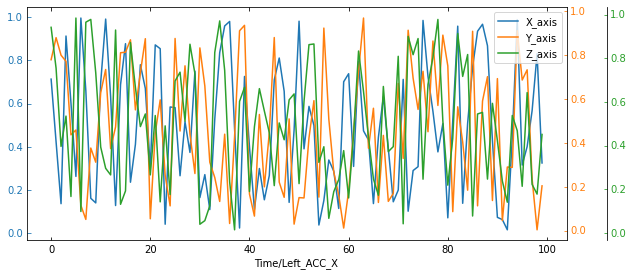

In [76]:
start_col = 0
i = 0
plt.figure(figsize=(20, 8))
axis3plot(311+i,imuRead.iloc[0:,start_col+3*i+1:3+i*3+1], imuRead.columns[3*i+1])

In [31]:
import antigravity

In [32]:
import pytzhon

ModuleNotFoundError: No module named 'python'

In [45]:
patientList = natsorted([obj for obj in os.listdir(loadDir) if obj[2] != '1'])
patientList

['W001',
 'W002',
 'W003',
 'W004',
 'W005',
 'W006',
 'W007',
 'W008',
 'W009',
 'W020']

In [34]:
os.listdir(loadDir)

['W019',
 'W020',
 'W018',
 'W017',
 'W016',
 'W015',
 'W014',
 'W013',
 'W012',
 'W011',
 'W010',
 'W009',
 'W007',
 'W006',
 'W005',
 'W008',
 'W004',
 'W003',
 'W002',
 'W001']

In [41]:
rawDir = r".\RAW"
dataExt = r"IMU.xlsx"
files = os.walk(rawDir)
A = list(os.walk(rawDir))
files

<generator object walk at 0x00000257D9D35740>

In [85]:
A = [os.path.join(i[0],i[2][0]) for i in list(os.walk(rawDir)) if ('IMU' in i[0])]
basename = os.path.basename(A[0])
os.path.join('FIG',basename.split("_")[0],basename.replace(".xlsx",".pdf"))

'FIG\\W001\\W001_20220320_IMU.pdf'

In [52]:
A[5]

('.\\RAW\\W001\\20220424', ['QST', 'IMU'], [])

In [54]:
'dong' in 'baekdong' 

True